In [37]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras import Sequential
import keras
import numpy as np
import pandas as pd

In [38]:
#import the data ---> these lines are just testing.
test = pd.read_csv("data_four_labels/coffee/_wijo648v0g3208.csv")
print(test)

test2=pd.read_csv("data_four_labels/coffee/2sGQuduhAf41354.csv")
print(test2)

final_df=pd.concat([test,test2])
print(final_df)

      class        x1        y1        z1        v1        x2        y2  \
0    coffee  0.490560  0.290803 -0.457349  0.999989  0.507861  0.251743   
1    coffee  0.490317  0.296208 -0.467214  0.999987  0.507768  0.253555   
2    coffee  0.490271  0.300322 -0.470750  0.999986  0.507730  0.255209   
3    coffee  0.490268  0.302454 -0.487628  0.999985  0.507728  0.256161   
4    coffee  0.490803  0.303688 -0.505418  0.999985  0.507995  0.256749   
..      ...       ...       ...       ...       ...       ...       ...   
110  coffee  0.496863  0.302861 -0.649061  0.999965  0.513863  0.255302   
111  coffee  0.496631  0.301382 -0.643764  0.999955  0.513532  0.254744   
112  coffee  0.496510  0.300023 -0.687388  0.999919  0.513147  0.254390   
113  coffee  0.496565  0.299678 -0.744448  0.999876  0.513067  0.254359   
114  coffee  0.496665  0.299629 -0.655965  0.999852  0.513007  0.254376   

           z2        v2        x3  ...       z73  v73       x74       y74  \
0   -0.412709  0.99998

In [39]:
import glob

train_df = pd.DataFrame()
test_df = pd.DataFrame()
names = ["coffee", "dog", "door", "milk"]
i = 0
for label in names:
    files = glob.glob(f"data_four_labels/{label}/*.csv")
    for f in files:
        csv = pd.read_csv(f)

        #this is in order to separate the training set from the test set (setting 25% of values)
        if i%4 != 0:    
            train_df = pd.concat([train_df, csv])
        else:
            test_df = pd.concat([test_df, csv])
        i += 1
        

print(train_df.shape, test_df.shape)
print("training set:")
print(train_df)
print("testing set: ")
# test_df.head()

(9776, 301) (3667, 301)
training set:
     class        x1        y1        z1        v1        x2        y2  \
0   coffee  0.606142  0.244242 -0.815652  0.999938  0.623723  0.211371   
1   coffee  0.606009  0.244254 -0.815749  0.999938  0.623691  0.211367   
2   coffee  0.605101  0.244437 -0.754448  0.999933  0.623574  0.211543   
3   coffee  0.602850  0.244439 -0.760619  0.999929  0.622494  0.211495   
4   coffee  0.602109  0.244449 -0.827007  0.999929  0.622169  0.211413   
..     ...       ...       ...       ...       ...       ...       ...   
75    milk  0.497894  0.306149 -0.517604  0.999934  0.515566  0.259491   
76    milk  0.497847  0.305891 -0.508041  0.999933  0.515531  0.259391   
77    milk  0.497788  0.305599 -0.499464  0.999932  0.515466  0.259253   
78    milk  0.497708  0.305279 -0.495048  0.999933  0.515386  0.259108   
79    milk  0.497436  0.305055 -0.492145  0.999933  0.515184  0.258973   

          z2        v2        x3  ...       z73  v73       x74       y74 

### Since I am working on varying time frames, I will be concatenating the data into sets of n-frames together as one datapoint


## ok, use lists next time, and then transform into a pandas dataframe


In [47]:
def header(FrameNumber, className):
    #at first, only one element, the class name
    headerList=[className]
    for i in range(FrameNumber):
        for val in range(1, num_coords+1):        
            headerList += ['x{}'.format(val), 'y{}'.format(val), 'z{}'.format(val), 'v{}'.format(val)]
            all_frames = all_frames.reshape((len(df), 75, 4))
    print(headerList)
    return headerList


In [78]:
def time_continuity(df, FrameNumber):
    # ls = df.values.tolist()
    # label = ls[0][0]
    # print(label)
    # print(ls[0])

#---- SARINA, uncomment DOWN HERE------#
    #-------------------------------------------
    # label = df[0].iloc[0]
    # print("HI")
    # previous_frames = [label]
    # #saving the first n frames:
    # headerList = header(FrameNumber, label)
    # new_df = pd.DataFrame(columns = headerList)
    
    # for row in range(FrameNumber):
    #     i=0
    #     for el in row:
    #         if i==0:
    #             i+=1
    #             continue
    #         previous_frames.append(df[el].iloc[row])
        
    # for row in range(FrameNumber, len(df)):
    #     new_df.concat(previous_frames)
    #     #removing the first n elements.
    #     previous_frames = previous_frames[len(headerList):]
    #     previous_frames.push_front(label)

    #     i=0
    #     for el in row:
    #         if i==0:
    #             #skip the class name
    #             i+=1
    #             continue
    #         previous_frames.append(df[el].iloc[row])
    


In [79]:
FrameNumber = 10
time_continuity(train_df, FrameNumber = 2)
time_continuity(test_df, FrameNumber = 2)

coffee
['coffee', 0.6061416864395142, 0.2442424297332763, -0.8156522512435913, 0.9999375343322754, 0.6237226724624634, 0.2113707065582275, -0.776337742805481, 0.9999219179153442, 0.6340014934539795, 0.2112037092447281, -0.7764176726341248, 0.9999033212661744, 0.6429426670074463, 0.211775541305542, -0.7763519287109375, 0.9998898506164552, 0.5881365537643433, 0.2114824056625366, -0.775259256362915, 0.9999196529388428, 0.5741453766822815, 0.211712971329689, -0.7753273844718933, 0.99990713596344, 0.5624213814735413, 0.2122805714607238, -0.7756565809249878, 0.999902367591858, 0.6572209000587463, 0.226536214351654, -0.4767614305019378, 0.9999288320541382, 0.5462870001792908, 0.2321047931909561, -0.4648495316505432, 0.9999278783798218, 0.6233152747154236, 0.2898215651512146, -0.7005770802497864, 0.9999862909317015, 0.5847905278205872, 0.2890363335609436, -0.6983402371406555, 0.9999843835830688, 0.7355091571807861, 0.4303605854511261, -0.2986708581447601, 0.9998692274093628, 0.4805304408073425

#### separating the features from the labels (just some testing, not actually used)

In [ ]:
def seperate_label(df):
    df_features = df.copy()

    df_labels = df_features.pop("class")

    df_features = np.array(df_features)
    # df_labels = np.array(df_labels)
    print(df_features.shape)
    print(df_labels.shape, type(df_labels))
    return df_features, df_labels

In [ ]:
X_train, Y_train = seperate_label(train_df)

(9776, 300)
(9776,) <class 'pandas.core.series.Series'>


In [ ]:
X_val, Y_val = seperate_label(test_df)

(3667, 300)
(3667,) <class 'pandas.core.series.Series'>


In [ ]:
# mydict = [{'a': 1, 'b': 2, 'c': 3, 'd': 4},
#           {'a': 100, 'b': 200, 'c': 300, 'd': 400},
#           {'a': 1000, 'b': 2000, 'c': 3000, 'd': 4000 }]
# df = pd.DataFrame(mydict)
# print(df.head())
# mylist = []
# mylist.append(df.iloc[1])
# for i in mylist:
#     print(i)
#     # for l in i:
#     #     print(l)

      a     b     c     d
0     1     2     3     4
1   100   200   300   400
2  1000  2000  3000  4000
a    100
b    200
c    300
d    400
Name: 1, dtype: int64


I"ll also remap every string to an int
per example, 
through a dictionary

In [ ]:
def reformat_label(df_labels):    
#should be between 0 and 3
    dicti={"coffee": 0, "dog": 1, "door": 2, "milk": 3}
    # for element in df_labels:
    #     element = dicti[element]

    def change_label(x):
        return dicti[x]

    df_labels = df_labels.apply(change_label)
    df_labels.head()
    return df_labels

Y_train = reformat_label(Y_train)
Y_val = reformat_label(Y_val)

In [ ]:
Y_train, Y_val

(0     0
 1     0
 2     0
 3     0
 4     0
      ..
 75    3
 76    3
 77    3
 78    3
 79    3
 Name: class, Length: 9776, dtype: int64,
 0      0
 1      0
 2      0
 3      0
 4      0
       ..
 159    3
 160    3
 161    3
 162    3
 163    3
 Name: class, Length: 3667, dtype: int64)

In [ ]:
#I have to make each label a single vector 
# I can just rotate (transpose, since now I have a single rolumn, I will make it into many rows)! 
Y_train = np.array([Y_train]).T
Y_val = np.array([Y_val]).T
print(Y_train.shape, Y_val.shape)

(9776, 1) (3667, 1)


#### train_test_split

##### I'll split into train and val, and then tensorflow will split for me in train and test

In [ ]:
from sklearn.utils import shuffle

X_train,Y_train = shuffle(X_train, Y_train, random_state=0)
X_val,Y_val = shuffle(X_val, Y_val, random_state=0)
X_train, Y_train


(array([[ 0.53891486,  0.3667444 , -0.58347023, ...,  0.        ,
          0.        ,  0.        ],
        [ 0.51216543,  0.22902365, -0.50954175, ...,  0.        ,
          0.        ,  0.        ],
        [ 0.48298231,  0.25468689, -0.52562565, ...,  0.        ,
          0.        ,  0.        ],
        ...,
        [ 0.69303405,  0.32725036, -0.30897957, ...,  0.48944685,
         -0.02432649,  0.        ],
        [ 0.31904715,  0.31237128, -0.70534962, ...,  0.        ,
          0.        ,  0.        ],
        [ 0.49790773,  0.20905493, -0.65739161, ...,  0.        ,
          0.        ,  0.        ]]),
 array([[1],
        [3],
        [3],
        ...,
        [2],
        [1],
        [1]], dtype=int64))

## creating the model

In [ ]:
model = Sequential([
    Dense(units=128, activation='relu'),
    Dense(units=64, activation='relu',
          kernel_regularizer=keras.regularizers.l1_l2(0.01)),
    Dropout(0.1),
    Dense(units=4, activation='softmax')
])

In [ ]:
#cost function
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.optimizers import Adam

model.compile(loss=SparseCategoricalCrossentropy(), optimizer=Adam(), metrics=["accuracy"])

### checkpoints are like saving the model, but at different epochs


In [ ]:
checkpoint = tf.keras.callbacks.ModelCheckpoint(
    "model_checkpoints/regularized.{epoch:02d}-{val_accuracy:.2f}",
    monitor='val_accuracy',
    verbose=0,
    save_best_only=True,
    save_weights_only=False,
    mode='auto',
    #everytime the accuracy gets better, it saves
    save_freq='epoch',
)

In [ ]:
#fitting
history = model.fit(X_train,Y_train, epochs=20, validation_data=(X_val,Y_val), callbacks=[checkpoint])

Epoch 1/20
306/306 [==============================] - 8s 16ms/step - loss: 2.9773 - accuracy: 0.5720 - val_loss: 1.2796 - val_accuracy: 0.5689
Epoch 2/20
306/306 [==============================] - 1s 5ms/step - loss: 1.0281 - accuracy: 0.6491 - val_loss: 1.1686 - val_accuracy: 0.5569
Epoch 3/20
306/306 [==============================] - 4s 12ms/step - loss: 0.9075 - accuracy: 0.6912 - val_loss: 1.0786 - val_accuracy: 0.5738
Epoch 4/20
306/306 [==============================] - 4s 12ms/step - loss: 0.8354 - accuracy: 0.7174 - val_loss: 1.1037 - val_accuracy: 0.6103
Epoch 5/20
306/306 [==============================] - 2s 6ms/step - loss: 0.7840 - accuracy: 0.7385 - val_loss: 1.1427 - val_accuracy: 0.5765
Epoch 6/20
306/306 [==============================] - 2s 6ms/step - loss: 0.7474 - accuracy: 0.7579 - val_loss: 1.1445 - val_accuracy: 0.6008
Epoch 7/20
306/306 [==============================] - 2s 6ms/step - loss: 0.7116 - accuracy: 0.7707 - val_loss: 1.1119 - val_accuracy: 0.5817
Epo

In [ ]:
model.evaluate(X_val,Y_val)
model.summary()

115/115 [==============================] - 0s 3ms/step - loss: 1.4289 - accuracy: 0.6169
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               38528     
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 4)                 260       
                                                                 
Total params: 47,044
Trainable params: 47,044
Non-trainable params: 0
_________________________________________________________________


## save the model

In [ ]:
model.save("saved_model")

INFO:tensorflow:Assets written to: saved_model\assets


In [ ]:
test_df = np.array([[0.4981820583343506,0.3041764795780182,-0.39641207456588745,0.9999492764472961,0.5154309272766113,0.2550220787525177,-0.34935909509658813,0.9998473525047302,0.5238351225852966,0.2552952766418457,-0.34945884346961975,0.9998874068260193,0.5324825644493103,0.25629663467407227,-0.3490661680698395,0.9998465776443481,0.480642706155777,0.258960485458374,-0.35233527421951294,0.9998729228973389,0.46913933753967285,0.26167136430740356,-0.3522539734840393,0.9999103546142578,0.4588560163974762,0.26559099555015564,-0.35270392894744873,0.9998877644538879,0.5477309823036194,0.2884930372238159,-0.08250369131565094,0.9998624324798584,0.44203734397888184,0.2937893569469452,-0.08980625122785568,0.9999209046363831,0.5207302570343018,0.3572015166282654,-0.2996494770050049,0.9999455809593201,0.4778904318809509,0.35783419013023376,-0.303683340549469,0.9999536871910095,0.6314497590065002,0.5698841214179993,0.008182904683053493,0.9999152421951294,0.37602466344833374,0.5611208081245422,0.020433634519577026,0.9998253583908081,0.7292965650558472,0.9798671007156372,-0.32061514258384705,0.9971438646316528,0.20657332241535187,0.8604757785797119,-0.35482174158096313,0.9956580996513367,0.5498597621917725,0.8489202857017517,-0.7637590169906616,0.9986798167228699,0.37362605333328247,0.6491265296936035,-0.8803924322128296,0.9952695369720459,0.4984210431575775,0.8526077270507812,-0.8525819778442383,0.9939749836921692,0.4279037117958069,0.6301683187484741,-0.9744688868522644,0.9816589951515198,0.49681568145751953,0.7763991355895996,-0.7786155939102173,0.9938353300094604,0.43934187293052673,0.5735072493553162,-0.9105846285820007,0.9798092246055603,0.5083235502243042,0.7676472067832947,-0.7398286461830139,0.991555392742157,0.4291306436061859,0.581972599029541,-0.8635354042053223,0.9797517657279968,0.5966092348098755,1.2567808628082275,-0.008524066768586636,0.1589588075876236,0.38996055722236633,1.2599668502807617,0.010765359736979008,0.17815829813480377,0.5948789715766907,1.8001701831817627,0.003953699953854084,0.012086698785424232,0.4031899869441986,1.7931101322174072,-0.015372313559055328,0.00784522294998169,0.6021834015846252,2.2724609375,0.30393192172050476,0.0014408509014174342,0.42258867621421814,2.2609975337982178,0.15069334208965302,0.0005837850621901453,0.6074386835098267,2.337127685546875,0.3106561303138733,0.0007881768397055566,0.41845861077308655,2.323322296142578,0.15600086748600006,0.0007185556460171938,0.5843966603279114,2.4317216873168945,-0.0522509329020977,0.0006601922796107829,0.4535377621650696,2.422938585281372,-0.2161559760570526,0.001258615986444056,0.373634397983551,0.6499707102775574,-1.8444630711655918e-07,0.0,0.39679813385009766,0.5777179598808289,0.0013798748841509223,0.0,0.43735894560813904,0.534506618976593,-0.00420121755450964,0.0,0.47639840841293335,0.5254983901977539,-0.01024630106985569,0.0,0.5027356743812561,0.5411986708641052,-0.014173091389238834,0.0,0.45060163736343384,0.5403348207473755,-0.015738490968942642,0.0,0.5017736554145813,0.5638222098350525,-0.02503901533782482,0.0,0.4914117455482483,0.5653451681137085,-0.027088096365332603,0.0,0.47413501143455505,0.564212441444397,-0.0264134518802166,0.0,0.4494023323059082,0.5912742614746094,-0.021495746448636055,0.0,0.5018069744110107,0.6102883815765381,-0.025984806939959526,0.0,0.4879333972930908,0.6084942817687988,-0.0215410478413105,0.0,0.46763357520103455,0.6072394847869873,-0.018301531672477722,0.0,0.44739097356796265,0.6418318152427673,-0.02643604204058647,0.0,0.4959167242050171,0.6526373028755188,-0.02697780914604664,0.0,0.48271769285202026,0.6494451761245728,-0.015943871811032295,0.0,0.46350032091140747,0.6479849815368652,-0.009380415081977844,0.0,0.4440409541130066,0.686765730381012,-0.03130561113357544,0.0,0.48238319158554077,0.6835903525352478,-0.027893563732504845,0.0,0.4705689549446106,0.6809285879135132,-0.01684371940791607,0.0,0.4541867673397064,0.6818298101425171,-0.009424922056496143,0.0,0.5541528463363647,0.8231633305549622,-1.2188849041194771e-07,0.0,0.5286245942115784,0.7567625045776367,0.002618174534291029,0.0,0.490420401096344,0.725986659526825,-0.0019848633091896772,0.0,0.45551788806915283,0.727816104888916,-0.006525832694023848,0.0,0.4336313307285309,0.7500261068344116,-0.011036446318030357,0.0,0.4799780249595642,0.7299957275390625,-0.022469153627753258,0.0,0.4273468255996704,0.7438825368881226,-0.032165635377168655,0.0,0.4391612410545349,0.7527205348014832,-0.0347185879945755,0.0,0.4578348398208618,0.7505552768707275,-0.034520745277404785,0.0,0.4814111292362213,0.783324658870697,-0.027409298345446587,0.0,0.4299897849559784,0.79166579246521,-0.032714203000068665,0.0,0.4421943128108978,0.7919579744338989,-0.02897382713854313,0.0,0.4601382911205292,0.789323091506958,-0.02673531323671341,0.0,0.4840109646320343,0.8338181972503662,-0.03076060861349106,0.0,0.4401523470878601,0.8343431949615479,-0.032595742493867874,0.0,0.45229482650756836,0.8290730118751526,-0.02321871742606163,0.0,0.467772513628006,0.826426088809967,-0.01786368153989315,0.0,0.4874705970287323,0.8772450685501099,-0.03356040641665459,0.0,0.4529787600040436,0.8700811266899109,-0.03298313543200493,0.0,0.4627114236354828,0.8613516688346863,-0.02354632131755352,0.0,0.4751517176628113,0.8603678345680237,-0.016946855932474136,0.0]])
#this is coffee

model.predict(test_df)

1/1 [==============================] - 0s 36ms/step


2023-03-25 22:33:31.149521: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


array([[0.88871413, 0.0100118 , 0.03439517, 0.06687891]], dtype=float32)

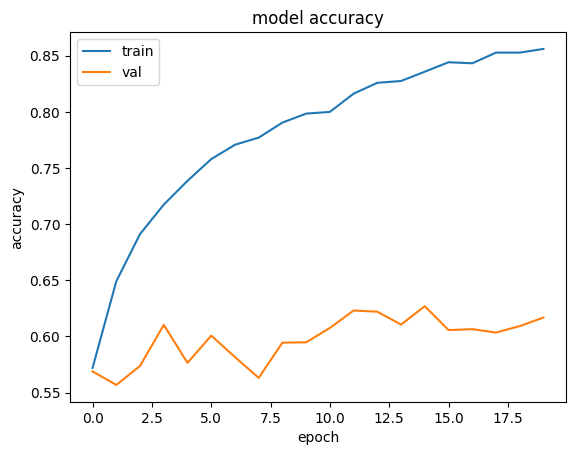

In [ ]:
from matplotlib import pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.savefig('accuracy_4_labels_regularization.png')
plt.show()

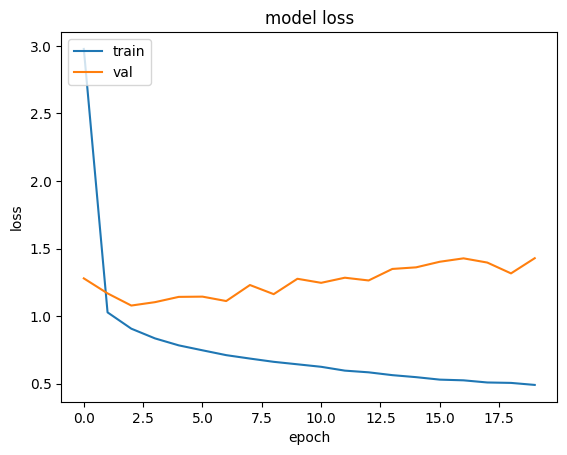

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.savefig('loss_4_labels_regularization.png')
plt.show()


## THis is the model I had written in the past


In [ ]:
model2 = Sequential([
    Dense(units=128, activation='relu'),
    Dense(units=64, activation='relu'),
    Dense(units=4, activation='softmax')
])
model2.compile(loss=SparseCategoricalCrossentropy(), optimizer=Adam(), metrics=["accuracy"])

In [ ]:
history2 = model2.fit(X_train,Y_train, epochs=20, validation_data=(X_val,Y_val))

Epoch 1/20
  1/314 [..............................] - ETA: 2:02 - loss: 1.4042 - accuracy: 0.3125

2023-03-25 23:14:51.573679: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


314/314 [==============================] - ETA: 0s - loss: 0.8633 - accuracy: 0.6317

2023-03-25 23:14:53.748808: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


314/314 [==============================] - 3s 8ms/step - loss: 0.8633 - accuracy: 0.6317 - val_loss: 0.8361 - val_accuracy: 0.6398
Epoch 2/20
314/314 [==============================] - 2s 7ms/step - loss: 0.6415 - accuracy: 0.7342 - val_loss: 0.8733 - val_accuracy: 0.6134
Epoch 3/20
314/314 [==============================] - 2s 6ms/step - loss: 0.5309 - accuracy: 0.7898 - val_loss: 0.8989 - val_accuracy: 0.6386
Epoch 4/20
314/314 [==============================] - 2s 7ms/step - loss: 0.4658 - accuracy: 0.8201 - val_loss: 0.9799 - val_accuracy: 0.6240
Epoch 5/20
314/314 [==============================] - 2s 7ms/step - loss: 0.3944 - accuracy: 0.8488 - val_loss: 0.9422 - val_accuracy: 0.6609
Epoch 6/20
314/314 [==============================] - 2s 7ms/step - loss: 0.3466 - accuracy: 0.8701 - val_loss: 1.0181 - val_accuracy: 0.6369
Epoch 7/20
314/314 [==============================] - 2s 7ms/step - loss: 0.3079 - accuracy: 0.8863 - val_loss: 1.1035 - val_accuracy: 0.6369
Epoch 8/20
314/31

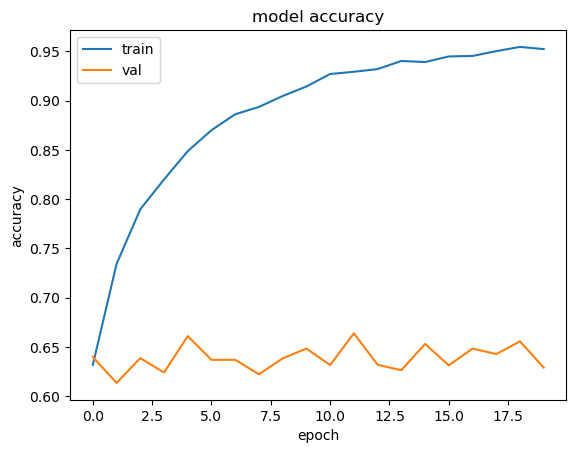

In [ ]:
from matplotlib import pyplot as plt
plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.savefig('accuracy_4_labels_no_regularization.png')
plt.show()

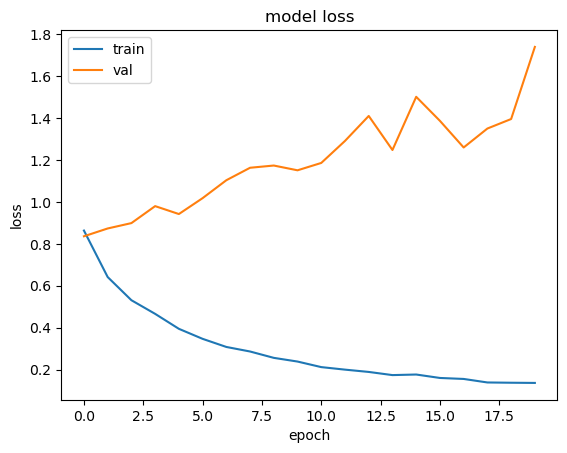

In [ ]:
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.savefig('loss_4_labels_no_regularization.png')
plt.show()
